In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
red_wine = pd.read_csv(r'C:\Users\janin\OneDrive\Desktop\wine+quality\winequality-red.csv',sep=';') # Gathering data
red_wine.isnull()
red_wine.columns = red_wine.columns.str.replace(" ", "_")
red_wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

red_wine.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


In [5]:
print(red_wine.isna().sum().sum())

0


In [7]:
red_wine_low=red_wine[red_wine['quality_label'] != 'high']
red_wine_high=red_wine[red_wine['quality_label'] == 'high']

red_wine_low2 = red_wine_low[['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity',
       'free_sulfur_dioxide', 'pH', 'quality', 'residual_sugar', 'sulphates',
       'total_sulfur_dioxide', 'volatile_acidity']]
red_wine_high2 = red_wine_high[['alcohol', 'chlorides', 'citric_acid', 'density', 'fixed_acidity',
       'free_sulfur_dioxide', 'pH', 'quality', 'residual_sugar', 'sulphates',
       'total_sulfur_dioxide', 'volatile_acidity']]

In [35]:
red_wine_low.shape[0]

1581

In [33]:
red_wine_high.shape[0]

18

In [41]:
red_wine_high2.shape[0]

18

In [42]:
red_wine_low2.shape[0]

1581

### Low Red Wine

In [10]:
from scipy import stats

In [11]:
def outliers_detection(data):
    data = np.array(data)
    percentile_25 = np.percentile(data, 25)
    percentile_50 = np.percentile(data, 50)
    percentile_75 = np.percentile(data, 75)
    lower_bound = percentile_25 - 1.5 * (percentile_75 - percentile_25)
    upper_bound = percentile_75 + 1.5 * (percentile_75 - percentile_25)
    outliers = []
    for point in list(data):
        if point < lower_bound or point > upper_bound:
            outliers.append(point)
        else:
            outliers.append('not a outlier')
    
    return outliers

In [64]:
d_outliers_focused = {}
for name in list(red_wine_low2):
    d_outliers_focused.setdefault(name, outliers_detection(red_wine_low2[name]))
red_wine_outliers_focused = pd.DataFrame(data=d_outliers_focused)
red_wine_outliers_focused.head()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier
1,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier
2,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier
3,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier
4,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier


In [65]:
red_wine_outliers_focused.shape[0]

1581

In [66]:
series_list = []
for index, row in red_wine_outliers_focused.iterrows():
    for name in list(red_wine_outliers_focused):
        if type(row[name]) == np.float64:
            series_list.append(row)
            break
            
red_wine_outliers_low = pd.DataFrame(series_list, columns=list(red_wine_outliers_focused))
red_wine_outliers_low.describe()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
count,391,391,391,391,391,391,391,391,391,391,391,391
unique,8,71,2,26,20,16,18,2,54,35,31,14
top,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier
freq,374,295,390,348,343,361,358,384,238,333,336,372


In [67]:
red_wine_outliers_low.shape[0]

391

In [68]:
red_wine_outliers_low.head(50)

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
9,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,6.1,not a outlier,not a outlier,not a outlier
11,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,6.1,not a outlier,not a outlier,not a outlier
13,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,1.56,not a outlier,not a outlier
14,not a outlier,0.176,not a outlier,not a outlier,not a outlier,52.0,not a outlier,not a outlier,3.8,not a outlier,145.0,not a outlier
15,not a outlier,0.17,not a outlier,not a outlier,not a outlier,51.0,not a outlier,not a outlier,3.9,not a outlier,148.0,not a outlier
17,not a outlier,0.368,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,1.28,not a outlier,not a outlier
18,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,4.4,not a outlier,not a outlier,not a outlier
19,not a outlier,0.341,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,1.08,not a outlier,not a outlier
33,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,10.7,not a outlier,not a outlier,not a outlier
35,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,not a outlier,5.5,not a outlier,not a outlier,not a outlier


In [69]:
outliers_indices = red_wine_outliers_low.index.tolist()
print(outliers_indices)

[9, 11, 13, 14, 15, 17, 18, 19, 33, 35, 38, 39, 40, 42, 43, 45, 55, 57, 64, 65, 79, 81, 83, 86, 88, 90, 91, 92, 94, 95, 106, 109, 120, 125, 126, 127, 130, 134, 142, 144, 145, 147, 151, 154, 155, 156, 157, 161, 163, 164, 169, 181, 188, 189, 190, 192, 199, 201, 205, 206, 215, 219, 226, 240, 243, 244, 258, 264, 267, 268, 269, 270, 271, 273, 274, 275, 276, 277, 279, 281, 289, 292, 301, 305, 306, 311, 322, 323, 325, 326, 333, 336, 337, 338, 345, 351, 352, 357, 361, 362, 364, 366, 367, 370, 372, 373, 374, 375, 376, 379, 388, 391, 392, 393, 397, 405, 406, 410, 412, 414, 426, 438, 442, 443, 447, 458, 462, 465, 467, 472, 475, 476, 477, 478, 485, 486, 488, 490, 493, 494, 495, 496, 498, 501, 502, 504, 507, 508, 509, 514, 515, 530, 531, 533, 536, 540, 541, 545, 546, 547, 548, 549, 550, 551, 552, 556, 557, 558, 559, 560, 576, 578, 582, 586, 587, 590, 592, 594, 597, 599, 602, 605, 615, 616, 625, 627, 628, 629, 630, 636, 640, 641, 642, 643, 647, 648, 650, 657, 663, 669, 671, 675, 680, 681, 683, 685, 

In [70]:
red_wine_low2.drop(red_wine_low2.index[outliers_indices], inplace=True)
red_wine_low2.describe()

C:\Users\janin\AppData\Local\Temp\ipykernel_32268\4130666220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_wine_low2.drop(red_wine_low2.index[outliers_indices], inplace=True)


,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,10.350868,0.078738,0.248361,0.996593,8.170924,14.960504,3.324538,5.617647,2.186008,0.631168,42.164706,0.523929
std,0.958847,0.014767,0.181280,0.001600,1.471322,8.797466,0.132235,0.730813,0.442696,0.115671,26.108973,0.165140
min,8.700000,0.039000,0.000000,0.992360,5.100000,1.000000,2.940000,3.000000,1.200000,0.330000,6.000000,0.120000
25%,9.500000,0.069250,0.080000,0.995522,7.100000,8.000000,3.230000,5.000000,1.900000,0.550000,22.000000,0.390000
50%,10.100000,0.078000,0.240000,0.996600,7.800000,13.000000,3.330000,6.000000,2.100000,0.610000,36.000000,0.520000
75%,11.000000,0.087000,0.390000,0.997600,9.000000,20.000000,3.410000,6.000000,2.500000,0.700000,55.750000,0.630000
max,13.000000,0.122000,0.730000,1.001000,12.300000,42.000000,3.680000,7.000000,3.650000,0.980000,122.000000,1.010000


In [72]:
red_wine_low2.shape[0]

1190

<Axes: >

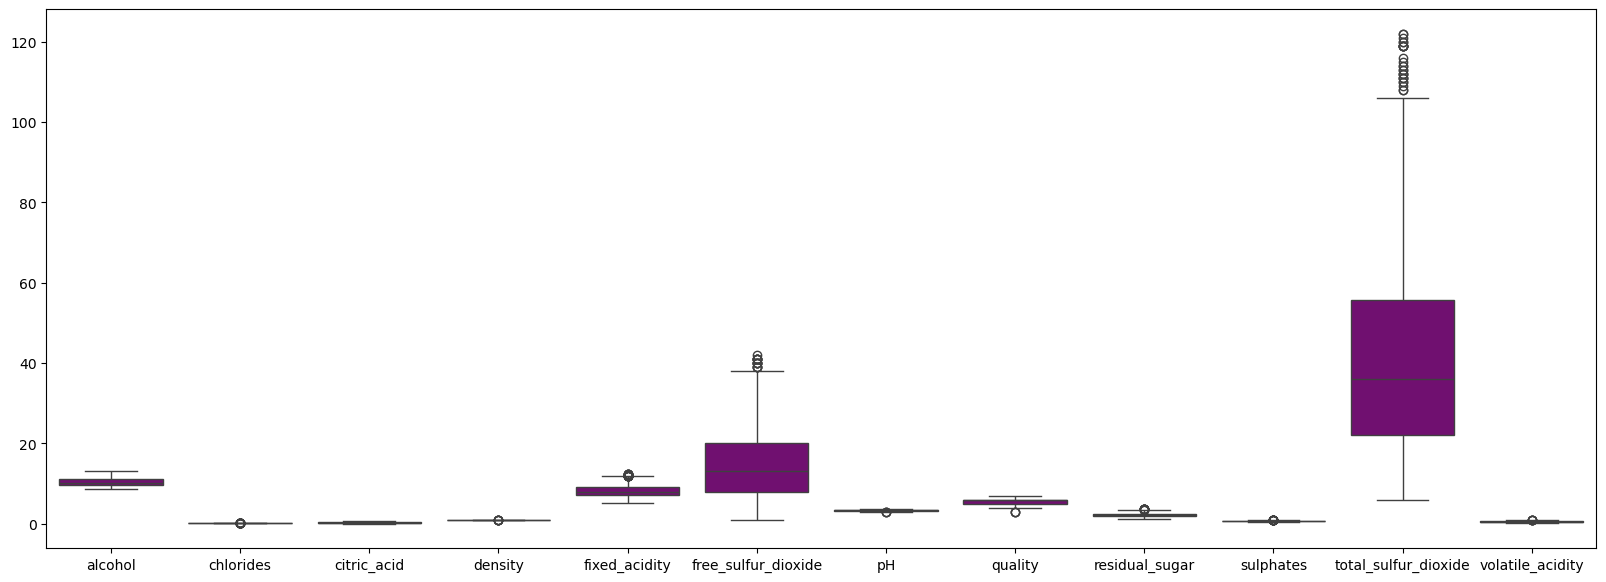

In [80]:
fig = plt.figure(figsize = (20,7))
sns.boxplot(data=red_wine_low2, color='purple')

### Scale high Quality

In [49]:
red_wine_high2.shape[0]

18

<Axes: >

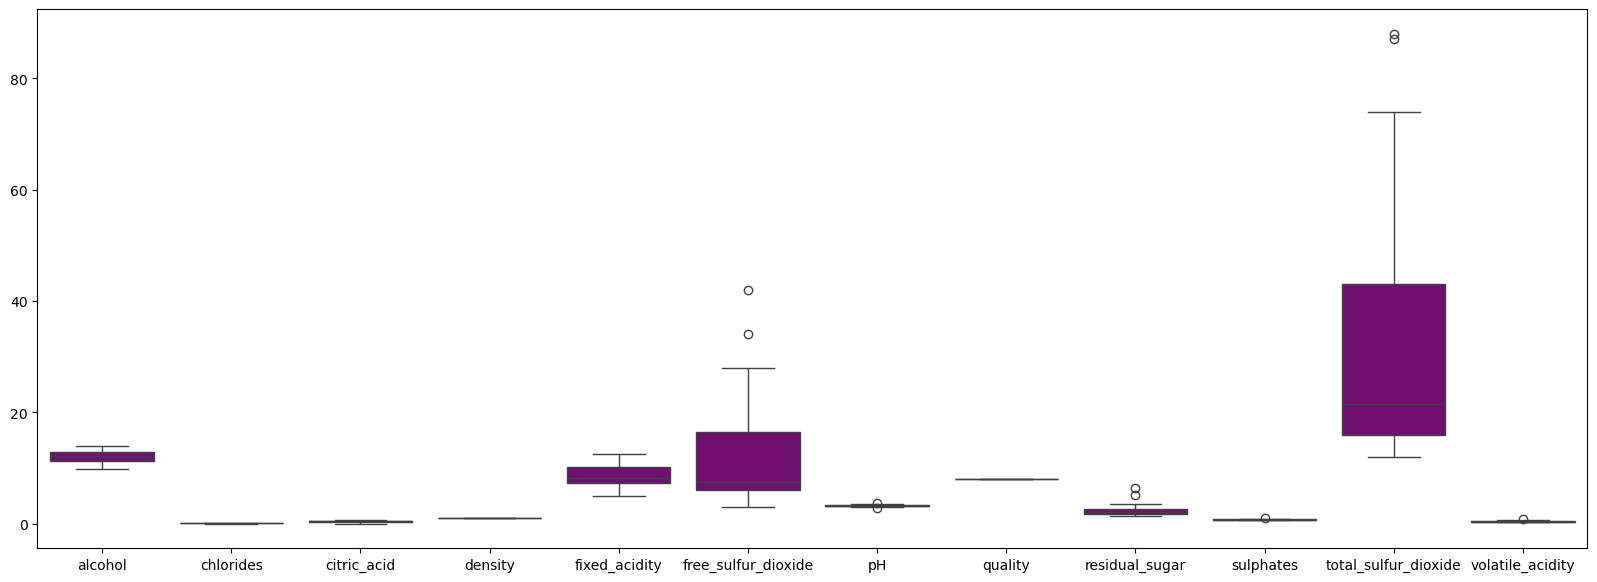

In [51]:
fig = plt.figure(figsize = (20,7))
sns.boxplot(data=red_wine_high2, color='purple')


In [58]:
red_wine_high2.shape[0]

18

In [74]:
red_wine_noout = pd.concat([red_wine_low2, red_wine_high2])
red_wine_noout.tail()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,quality,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
1202,11.7,0.068,0.39,0.99516,8.6,6.0,3.35,8,1.8,0.69,12.0,0.42
1269,14.0,0.044,0.03,0.99080,5.5,28.0,3.50,8,1.8,0.82,87.0,0.49
1403,10.0,0.061,0.33,0.99600,7.2,3.0,3.23,8,1.7,1.10,13.0,0.33
1449,11.3,0.056,0.31,0.99472,7.2,15.0,3.23,8,2.0,0.76,29.0,0.38
1549,11.4,0.074,0.30,0.99419,7.4,17.0,3.24,8,1.8,0.70,24.0,0.36


In [75]:
red_wine_noout.shape[0]

1208

<Axes: >

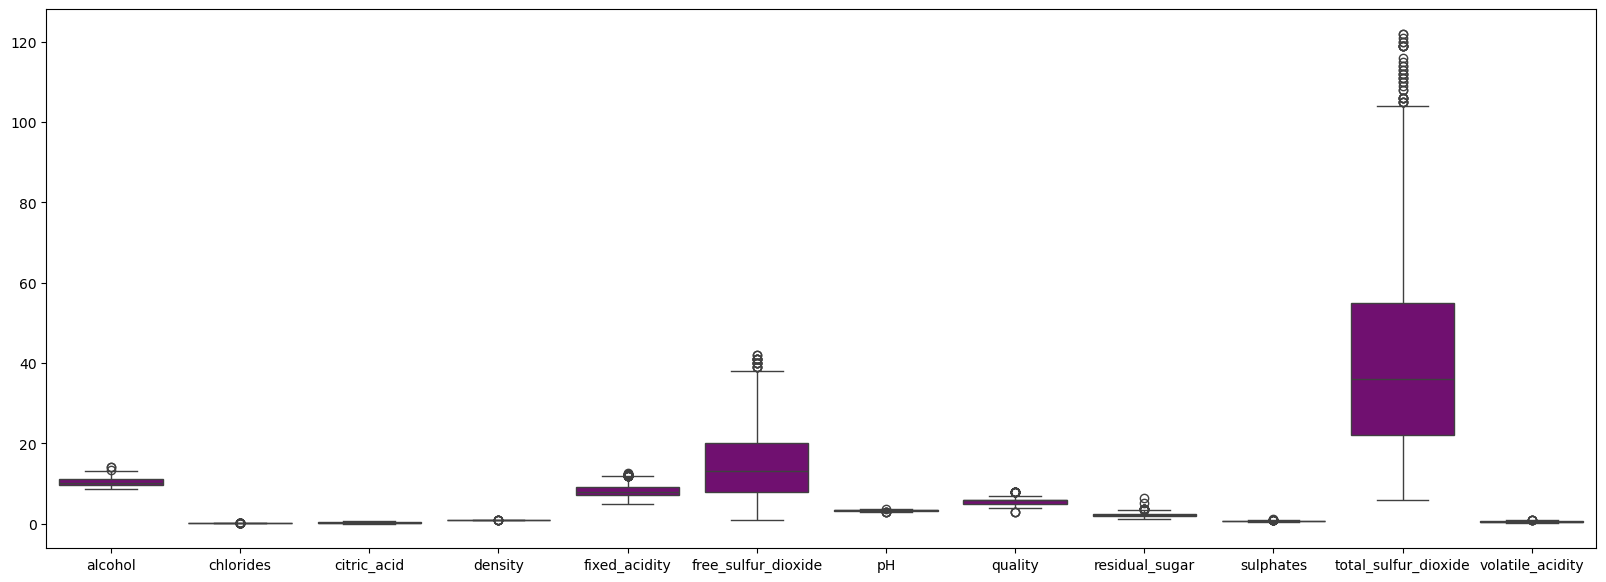

In [76]:
fig = plt.figure(figsize = (20,7))
sns.boxplot(data=red_wine_noout, color='purple')

### Normalization with MinMax Scaler

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(red_wine_noout)

<Axes: >

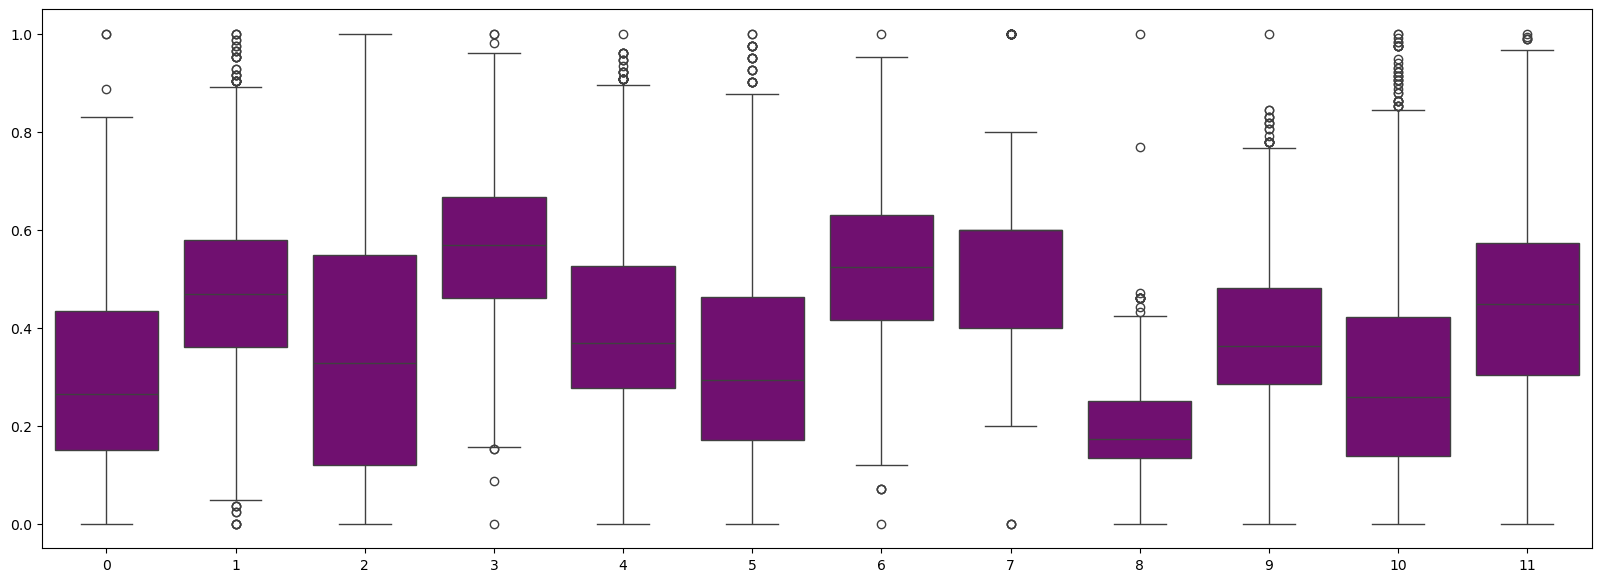

In [78]:
fig = plt.figure(figsize = (20,7))
sns.boxplot(data=data_scaled, color='purple')